In [2014]:
from ete3 import NCBITaxa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
ncbi = NCBITaxa()

In [ ]:
#-----------------------------------------------------------------------

In [1265]:
# MOVE DOWN TO BOTTOM OF PAGE
#Filter the noblasthit fasta file to include reads not hitting the NCBI database, export to new fasta file
noblasthit_input_dir = '/home/gamran/data/noblasthit'
noblasthit_files_in_folder = sorted([x for x in list(os.walk(noblasthit_input_dir, topdown=False))][-1][2])
noblasthit_bcs = sorted(list(NCBI_dfs_dict.keys()))

from Bio import SeqIO
os.chdir('/home/gamran/data/noblasthit')
outdir = '/home/gamran/analysis/'
os.curdir

for ind in range(0, len(noblasthit_bcs)):
    noNCBIhit_id = ''
    noNCBIhit_id = noblasthit_files_in_folder[ind][:-3] + ".WW_10012017.noncbihit.fa"
    not_NCBIhit_sequences = []
    for seq in SeqIO.parse(open(noblasthit_files_in_folder[ind]), 'fasta'):
        if seq.id not in list(NCBI_dfs_dict[noblasthit_bcs[ind]]['qseqid']):
            not_NCBIhit_sequences.append(seq)
    print(noblasthit_bcs[ind], len(not_NCBIhit_sequences))
    SeqIO.write(not_NCBIhit_sequences, noNCBIhit_id, "fasta")
    not_NCBIhit_sequences = []


BC00 184
BC01 10029
BC02 8386
BC03 1543
BC04 3541
BC05 3435
BC06 26083
NB00 5359


In [ ]:
#-----------------------------------------------------------------------

In [2203]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize': 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'}
label_config_y = {'fontsize': 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'}

In [4]:
#Constructing dataframes for each individual blasted barcode

os.chdir('/home/gamran/blast/')
outdir = '/home/gamran/analysis/'
os.curdir

'.'

In [18]:
blast_input_dir = '/home/gamran/blast'
blast_files_in_folder = [x for x in list(os.walk(blast_input_dir, topdown=False))][1][2]
NCBI_files_in_folder = sorted([x for x in blast_files_in_folder if 'NCBI' in x])

['1212_1D_barcoding_Wagga_BC00.WW_19121016.noblasthit.fa.NCBI04052016.001.besthit',
 '1212_1D_barcoding_Wagga_BC00.WW_19121016.noblasthit.fa.NCBI04052016.besthit',
 '1212_1D_barcoding_Wagga_BC01.WW_19121016.noblasthit.fa.NCBI04052016.001.besthit',
 '1212_1D_barcoding_Wagga_BC01.WW_19121016.noblasthit.fa.NCBI04052016.besthit',
 '1212_1D_barcoding_Wagga_BC02.WW_19121016.noblasthit.fa.NCBI04052016.001.besthit',
 '1212_1D_barcoding_Wagga_BC02.WW_19121016.noblasthit.fa.NCBI04052016.besthit',
 '1212_1D_barcoding_Wagga_BC03.WW_19121016.noblasthit.fa.NCBI04052016.001.besthit',
 '1212_1D_barcoding_Wagga_BC03.WW_19121016.noblasthit.fa.NCBI04052016.besthit',
 '1212_1D_barcoding_Wagga_BC04.WW_19121016.noblasthit.fa.NCBI04052016.besthit',
 '1212_1D_barcoding_Wagga_BC05.WW_19121016.noblasthit.fa.NCBI04052016.001.besthit',
 '1212_1D_barcoding_Wagga_BC05.WW_19121016.noblasthit.fa.NCBI04052016.besthit',
 '1212_1D_barcoding_Wagga_BC06.WW_19121016.noblasthit.fa.NCBI04052016.001.besthit',
 '1212_1D_barcod

In [30]:
#Creating a dictionary for NCBI blasted barcodes - key: 'barcode', value: related NCBI blast dataframe
NCBI_dfs_dict = {}
for file_name in NCBI_files_in_folder:
    if '.001.' in file_name:
        continue
    elif '.besthit' in file_name:
        key = '' #Safety 
        key = file_name.split('.')[0][-4:] # Try to make a pattern match, not an index hard code
        NCBI_dfs_dict[key] = pd.read_table(file_name, delim_whitespace=False, 
                                           names=['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 
                                                  'pident', 'nident', 'sgi', 'sacc', 'staxids', 'sscinames', 
                                                  'scomnames', 'sskingdoms', 'barcode']) #extra barcode column added
    continue

In [32]:
#Assigning barcodes to the barcode column based on dict key
for bcs, dfs in NCBI_dfs_dict.items():
    for i in range(0, len(dfs)):
        dfs.loc[i, 'barcode'] = bcs

In [37]:
#Joining the dataframes for individual barcodes together
NCBI_df_list = []
for bcs in NCBI_dfs_dict.keys():
    NCBI_df_list.append(NCBI_dfs_dict[bcs])
    
joint_NCBI_df = pd.concat(NCBI_df_list, axis=0, ignore_index=True)
joint_NCBI_df.sort_values('barcode', ascending=True, inplace=True)
joint_NCBI_df.reset_index(drop=True, inplace=True)


In [1677]:
#joint_NCBI_df
#print(len(NCBI_dfs_dict['BC01']))
#print(len(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == 'BC01']))
#joint_NCBI_df.tail()

In [1415]:
def search_rank_output_name(staxid_column, rank_search, read_ind):
    """Input staxid_column (a column of staxids from a dataframe) and rank_search (a desired taxonomic rank 
    from each staxid's lineage, outputs taxonomic name corresponding to rank_search or 'Unclassified' if
    unavailable"""
    taxid = ''
    if ';' in str(staxid_column[read_ind]):
        taxid = staxid_column[read_ind].split(';')[0]
    else:
        taxid = staxid_column[read_ind]
    taxid_lineage = ''
    taxid_lineage = ncbi.get_lineage(taxid)
    names = ''
    names = ncbi.get_taxid_translator(taxid_lineage)
    ranks = ''
    ranks = ncbi.get_rank(taxid_lineage) #Dict
    ranks2names = ''
    ranks2names = {ranks[k]:names[k] for k in names.keys() & ranks}
    if rank_search in ranks2names.keys():
        print(ranks2names[rank_search])#if rank in dict, print name
    else:
        print('Unclassified')


In [1426]:
#Function to generate taxonomy columns based on NCBITaxa results for NCBI hit dataframe, 
def search_rank_output_name_append_column(df, staxid_column, rank_search):
    """Input df, staxid_column from same df and rank_search (a desired taxonomic rank 
    from each staxid's lineage), outputs taxonomic name corresponding to rank_search or 'Unclassified' if
    unavailable and appends to df row by row"""
    rank_list = []
    for read_ind in range(0, len(staxid_column)):
        taxid = ''
        if ';' in str(staxid_column[read_ind]):
            taxid = staxid_column[read_ind].split(';')[0]
        else:
            taxid = staxid_column[read_ind]
        
        taxid_lineage = ''
        taxid_lineage = ncbi.get_lineage(taxid)
        
        names = ''
        names = ncbi.get_taxid_translator(taxid_lineage)
        
        ranks = ''
        ranks = ncbi.get_rank(taxid_lineage) #Dict
        
        ranks2names = ''
        ranks2names = {ranks[k]:names[k] for k in names.keys() & ranks}
        
        if rank_search in ranks2names.keys():
            rank_list.append(ranks2names[rank_search])#if rank in dict, print name
        else:
            rank_list.append('Unclassified')
    df[rank_search] = rank_list
# NOTE: Appending is always slow, try and find a better way e.g df.apply to a column based on staxids column

In [1431]:
#Appends columns to joint_NCBI_df_taxonomy corresponding to desired taxonomic ranks for metagenomic analysis
joint_NCBI_df_taxonomy = joint_NCBI_df.copy()
main_taxonomic_ranks = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for ranks in main_taxonomic_ranks:
    search_rank_output_name_append_column(joint_NCBI_df_taxonomy, 
                                          joint_NCBI_df_taxonomy['staxids'], 
                                          ranks)
    
#Removing unncessary columns from joint_NCBI_df_taxonomy
for columns in ['scomnames', 'sskingdoms', 'sscinames']:
    del joint_NCBI_df_taxonomy[columns] 

In [1543]:
#Making specific adjustment for 'Cloning vector lambda TXF97' spread across all taxonomic ranks
vector_selection = (joint_NCBI_df_taxonomy_adj.species == 'Cloning vector lambda TXF97')
main_taxonomic_ranks_nospecies = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus']
for ranks in main_taxonomic_ranks:
    joint_NCBI_df_taxonomy_adj[ranks][vector_selection] = '(Cloning vector lambda TXF97)'

/home/gamran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1572]:
#Making specific adjustment for 'dsDNA viruses', spread across 'phylum' and 'class'
virus_selection = (joint_NCBI_df_taxonomy_adj.superkingdom == 'Viruses')
main_taxonomic_ranks_phylumclass = ['phylum', 'class']
for ranks in main_taxonomic_ranks_phylumclass:
    joint_NCBI_df_taxonomy_adj[ranks][virus_selection] = 'dsDNA viruses, no RNA stage'
    
#Note: Need to somehow integrate into main code body...

/home/gamran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1433]:
#joint_NCBI_df_taxonomy_adj.head()
#print(len(joint_NCBI_df_taxonomy['staxids']))
#search_rank_output_name2(joint_NCBI_df_taxonomy['staxids'], 'superkingdom', 1)
#search_rank_output_name_append_column(joint_NCBI_df_taxonomy, joint_NCBI_df_taxonomy['staxids'], 'superkingdom')

In [1625]:
#count pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_NCBI_taxonomy_pivot_table(tax_df, rank, bcs):
    """From joint_NCBI_df_taxonomy, generate a pivot table listing rank counts, sorted by bcs"""
    pivot_table = tax_df.pivot_table(values='nident', 
                                            index=rank, 
                                            columns='barcode', 
                                            aggfunc='count', 
                                            fill_value=0, 
                                            margins=True)
    pivot_table.columns.name = None
    return pivot_table.sort_values(bcs, axis=0, ascending=False).head(n=15)

In [2035]:
# % pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_NCBI_taxonomy_pivot_table_pc(tax_df, rank, bcs):
    """From joint_NCBI_df_taxonomy, generate a pivot table listing rank %, sorted ascending by bcs"""
    pivot_table_pc = tax_df.pivot_table(values='nident', 
                                        index=rank, 
                                        columns='barcode', 
                                        aggfunc='count', 
                                        fill_value=0, 
                                        margins=True)
    pivot_table_pc.columns.name = None
    
    for brcs in pivot_table_pc.columns:
        pivot_table_pc[str(brcs) + '%'] = pivot_table_pc[brcs].apply(lambda x: (x / pivot_table_pc[brcs].loc['All'])*100)
    for brcs in pivot_table_pc.columns:
        if '%' not in brcs:
            pivot_table_pc.drop(brcs, axis=1, inplace=True)
    pivot_table_pc.drop('All', axis=0, inplace=True)

    pivot_table_pc2 = pivot_table_pc.sort_values(str(bcs) + '%', axis=0, ascending=False)
    return pivot_table_pc2.applymap(lambda x: '%.3f' % x).head(n=10)

In [2063]:
generate_NCBI_taxonomy_pivot_table(joint_NCBI_df_taxonomy, 'order', 'BC04')
generate_NCBI_taxonomy_pivot_table(joint_NCBI_df_taxonomy_adj, 'order', 'BC04')

,BC00,BC01,BC02,BC03,BC04,BC05,BC06,NB00,All
order,,,,,,,,,
All,134.0,451.0,4127.0,1764.0,8746.0,4424.0,3212.0,47.0,22905.0
Enterobacterales,52.0,146.0,1543.0,758.0,4169.0,1319.0,1178.0,24.0,9189.0
(Cloning vector lambda TXF97),56.0,239.0,1582.0,662.0,3724.0,1282.0,1679.0,16.0,9240.0
Caudovirales,9.0,51.0,286.0,128.0,683.0,239.0,264.0,0.0,1660.0
Poales,0.0,1.0,12.0,9.0,47.0,5.0,16.0,0.0,90.0
Pseudomonadales,13.0,7.0,606.0,135.0,30.0,1202.0,15.0,2.0,2010.0
Diptera,0.0,0.0,13.0,1.0,22.0,8.0,1.0,1.0,46.0
Unclassified,0.0,1.0,13.0,6.0,20.0,18.0,7.0,0.0,65.0
Rodentia,0.0,0.0,3.0,4.0,12.0,12.0,4.0,0.0,35.0


In [2036]:
generate_NCBI_taxonomy_pivot_table_pc(joint_NCBI_df_taxonomy, 'order', 'BC04')
generate_NCBI_taxonomy_pivot_table_pc(joint_NCBI_df_taxonomy_adj, 'order', 'BC04')

,BC00%,BC01%,BC02%,BC03%,BC04%,BC05%,BC06%,NB00%,All%
order,,,,,,,,,
Enterobacterales,38.806,32.373,37.388,42.971,47.668,29.815,36.675,51.064,40.118
(Cloning vector lambda TXF97),41.791,52.993,38.333,37.528,42.579,28.978,52.273,34.043,40.341
Caudovirales,6.716,11.308,6.930,7.256,7.809,5.402,8.219,0.000,7.247
Poales,0.000,0.222,0.291,0.510,0.537,0.113,0.498,0.000,0.393
Pseudomonadales,9.701,1.552,14.684,7.653,0.343,27.170,0.467,4.255,8.775
Diptera,0.000,0.000,0.315,0.057,0.252,0.181,0.031,2.128,0.201
Unclassified,0.000,0.222,0.315,0.340,0.229,0.407,0.218,0.000,0.284
Rodentia,0.000,0.000,0.073,0.227,0.137,0.271,0.125,0.000,0.153
Rhizobiales,0.000,0.000,0.024,0.000,0.080,0.203,0.000,0.000,0.074


In [1605]:
#IMPORTED COUNTS FOR READS HITTING TO REFERENCE GENOMES
os.chdir('/home/gamran/analysis')
blasthit_downloaded_counts = pd.read_csv('test.csv', index_col=0)
blasthit_downloaded_counts

,BC00,BC01,BC02,BC03,BC04,BC05,BC06,NB00,All
P. striformis f. sp. tritici WA,10.0,4.0,1306.0,2.0,3.0,247.0,4.0,2.0,1578.0
Parastagonospora nodorum,0.0,0.0,17.0,26.0,2.0,38.0,6.0,0.0,89.0
Pyrenophore tritici-repentis,6.0,3.0,33.0,1572.0,4.0,76.0,6.0,1.0,1701.0
Wheat,2715.0,7650.0,101894.0,36879.0,135376.0,79380.0,81409.0,550.0,445853.0
Zymoseptoria tritici,8.0,129.0,18.0,12.0,23.0,810.0,1345.0,2.0,2347.0
All,2739.0,7786.0,103268.0,38491.0,135408.0,80551.0,82770.0,555.0,451568.0


In [1668]:
#count pivot table of dataframe with taxonomic columns, including reference genomes across all ranks: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_all_hits_count_table(rank, bcs, dropwheat=False):
    blast_and_NCBI_df_list = [generate_NCBI_taxonomy_pivot_table(joint_NCBI_df_taxonomy_adj, rank, bcs), 
                    blasthit_downloaded_counts]
    blast_and_NCBI_hits = pd.concat(blast_and_NCBI_df_list)
    blast_and_NCBI_hits_sum = blast_and_NCBI_hits.groupby(blast_and_NCBI_hits.index).sum()
    
    if dropwheat == True:
        blast_and_NCBI_hits_sum.loc['All'] = blast_and_NCBI_hits_sum.loc['All'] - blast_and_NCBI_hits_sum.loc['Wheat']
        blast_and_NCBI_hits_sum.drop('Wheat', axis=0, inplace=True)
    
    return blast_and_NCBI_hits_sum.sort_values(bcs, axis=0, ascending=False).head(n=15)

In [1735]:
generate_all_hits_count_table('species', 'BC06', dropwheat=True)

,BC00,BC01,BC02,BC03,BC04,BC05,BC06,NB00,All
species,,,,,,,,,
All,158.0,587.0,5501.0,3376.0,8778.0,5595.0,4573.0,52.0,28620.0
(Cloning vector lambda TXF97),56.0,239.0,1582.0,662.0,3724.0,1282.0,1679.0,16.0,9240.0
Zymoseptoria tritici,10.0,132.0,19.0,13.0,24.0,827.0,1362.0,3.0,2390.0
Shigella sp. PAMC 28760,45.0,122.0,1311.0,672.0,3672.0,1122.0,1049.0,15.0,8008.0
Escherichia virus Lambda,7.0,43.0,199.0,89.0,450.0,146.0,179.0,0.0,1113.0
Escherichia coli,5.0,14.0,105.0,43.0,257.0,94.0,79.0,7.0,604.0
Enterobacteria phage HK629,1.0,3.0,51.0,19.0,130.0,62.0,64.0,0.0,330.0
Shigella flexneri,2.0,5.0,64.0,30.0,145.0,63.0,36.0,1.0,346.0
Salmonella enterica,0.0,5.0,35.0,11.0,90.0,19.0,11.0,1.0,172.0


In [1684]:
# % pivot table of dataframe with taxonomic columns, including reference genomes across all ranks: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_all_hits_pc_table(rank, bcs, dropwheat=False):
    blast_and_NCBI_df_list = [generate_NCBI_taxonomy_pivot_table(joint_NCBI_df_taxonomy_adj, rank, bcs), 
                    blasthit_downloaded_counts]
    blast_and_NCBI_hits = pd.concat(blast_and_NCBI_df_list)
    blast_and_NCBI_hits_sum = blast_and_NCBI_hits.groupby(blast_and_NCBI_hits.index).sum()
    
    if dropwheat == True:
        blast_and_NCBI_hits_sum.loc['All'] = blast_and_NCBI_hits_sum.loc['All'] - blast_and_NCBI_hits_sum.loc['Wheat']
        blast_and_NCBI_hits_sum.drop('Wheat', axis=0, inplace=True)
    
    for brcs in blast_and_NCBI_hits_sum.columns:
        blast_and_NCBI_hits_sum[str(brcs) + '%'] = blast_and_NCBI_hits_sum[brcs].apply(lambda x: (x / blast_and_NCBI_hits_sum[brcs].loc['All'])*100)
    for brcs in blast_and_NCBI_hits_sum.columns:
        if '%' not in brcs:
            blast_and_NCBI_hits_sum.drop(brcs, axis=1, inplace=True)
    blast_and_NCBI_hits_sum.drop('All', axis=0, inplace=True)
    
    blast_and_NCBI_hits_sum2 = blast_and_NCBI_hits_sum.sort_values(str(bcs) + '%', axis=0, ascending=False)
    return blast_and_NCBI_hits_sum2.applymap(lambda x: '%.3f' % x).head(n=10)

In [2034]:
generate_all_hits_pc_table('phylum', 'BC01', dropwheat=True)

,BC00%,BC01%,BC02%,BC03%,BC04%,BC05%,BC06%,NB00%,All%
phylum,,,,,,,,,
(Cloning vector lambda TXF97),35.443,40.716,28.758,19.609,42.424,22.913,36.716,30.769,32.285
Proteobacteria,41.772,26.065,39.157,26.688,47.949,47.435,26.132,50.000,39.686
Zymoseptoria tritici,5.063,21.976,0.327,0.355,0.262,14.477,29.412,3.846,8.201
"dsDNA viruses, no RNA stage",5.696,8.688,5.199,3.791,7.781,4.290,5.773,0.000,5.804
Ascomycota,1.899,0.852,0.618,0.533,0.068,1.859,0.481,3.846,0.678
P. striformis f. sp. tritici WA,6.329,0.681,23.741,0.059,0.034,4.415,0.087,3.846,5.514
Pyrenophore tritici-repentis,3.797,0.511,0.600,46.564,0.046,1.358,0.131,1.923,5.943
Firmicutes,0.000,0.170,0.000,0.000,0.011,0.018,0.022,0.000,0.014
Streptophyta,0.000,0.170,0.291,0.355,0.627,0.161,0.569,1.923,0.419


In [2037]:
#list(generate_all_hits_pc_table('phylum', 'BC01', dropwheat=True)['BC01%'])
#tuple([float(i) for i in generate_all_hits_pc_table('phylum', 'BC01', dropwheat=True)['BC01%']])


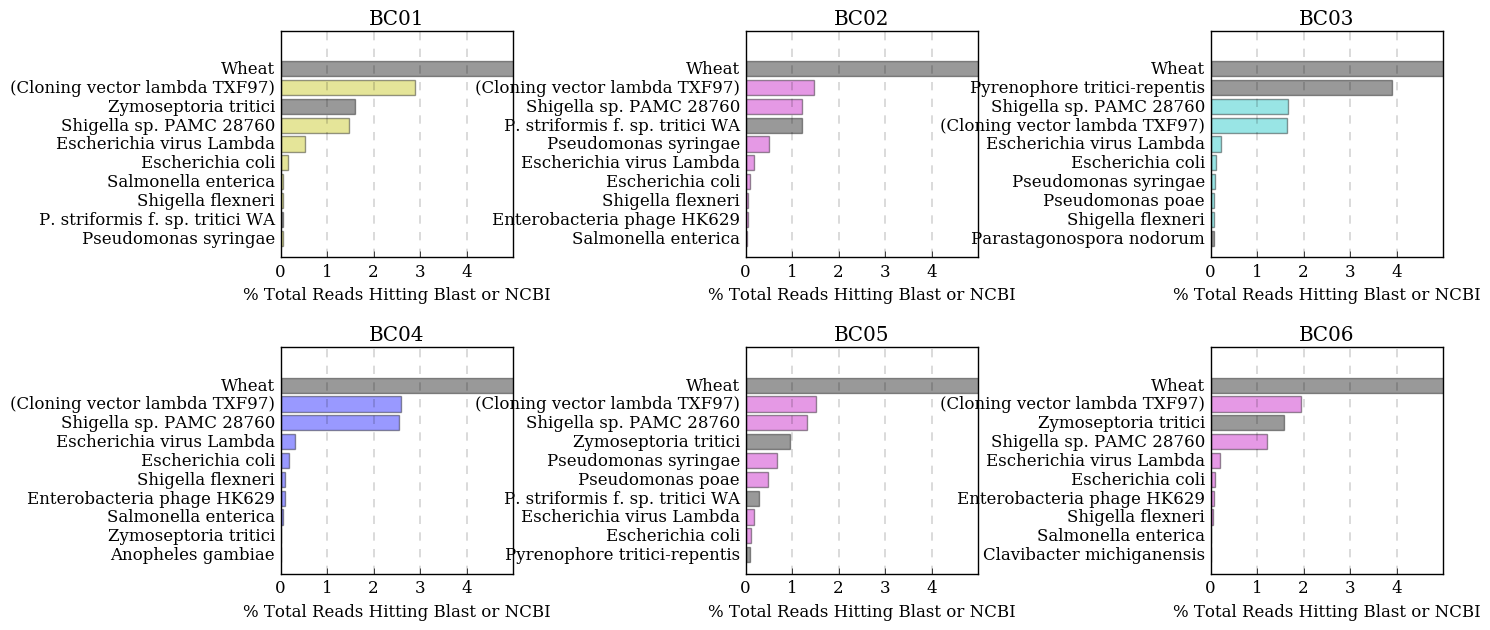

In [2205]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'

def applyPlotStyle(ax_ind1, ax_ind2, bcs, rank):
    cycol_one = ''
    cycol_one = random.choice(cycol)
    labels = ''
    labels = tuple(generate_all_hits_pc_table(rank, bcs, dropwheat=False)[bcs + '%'].index)
    y_pos = ''
    y_pos = np.arange(len(labels))
    sizes = ''
    sizes = tuple([float(i) for i in generate_all_hits_pc_table(rank, bcs, dropwheat=False)[bcs + '%']])

    colors = []
    for name in labels:
        if name in list(blasthit_downloaded_counts.index):
            colors.append('k')
        else:
            colors.append(cycol_one)
    
    ax[ax_ind1, ax_ind2].barh(y_pos, sizes, align='center', alpha=0.4, color=colors)
    ax[ax_ind1, ax_ind2].set_yticks(y_pos)
    ax[ax_ind1, ax_ind2].set_yticklabels(labels)
    ax[ax_ind1, ax_ind2].tick_params(top="off", right="off", left="off")
    ax[ax_ind1, ax_ind2].set_xlim([0, 5])
    ax[ax_ind1, ax_ind2].set_xlabel('% Total Reads Hitting Blast or NCBI')
    ax[ax_ind1, ax_ind2].set_xticks(range(0, 5, 1))
    ax[ax_ind1, ax_ind2].set_title(bcs)
    ax[ax_ind1, ax_ind2].invert_yaxis()
    ax[ax_ind1, ax_ind2].grid(b=None, which='major', axis='x', linestyle='dashed', linewidth=0.2)

ax1_list = [0,0,0,1,1,1]
ax2_list = [0,1,2,0,1,2]
bc_list = ['BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'BC06']
for ax1, ax2, bcs, in zip(ax1_list, ax2_list, bc_list):
    applyPlotStyle(ax1, ax2, bcs, 'species')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=0.4)
plt.show()

['Proteobacteria',
 '(Cloning vector lambda TXF97)',
 'P. striformis f. sp. tritici WA',
 'dsDNA viruses, no RNA stage',
 'Ascomycota',
 'Pyrenophore tritici-repentis',
 'Actinobacteria',
 'Zymoseptoria tritici',
 'Parastagonospora nodorum',
 'Streptophyta']

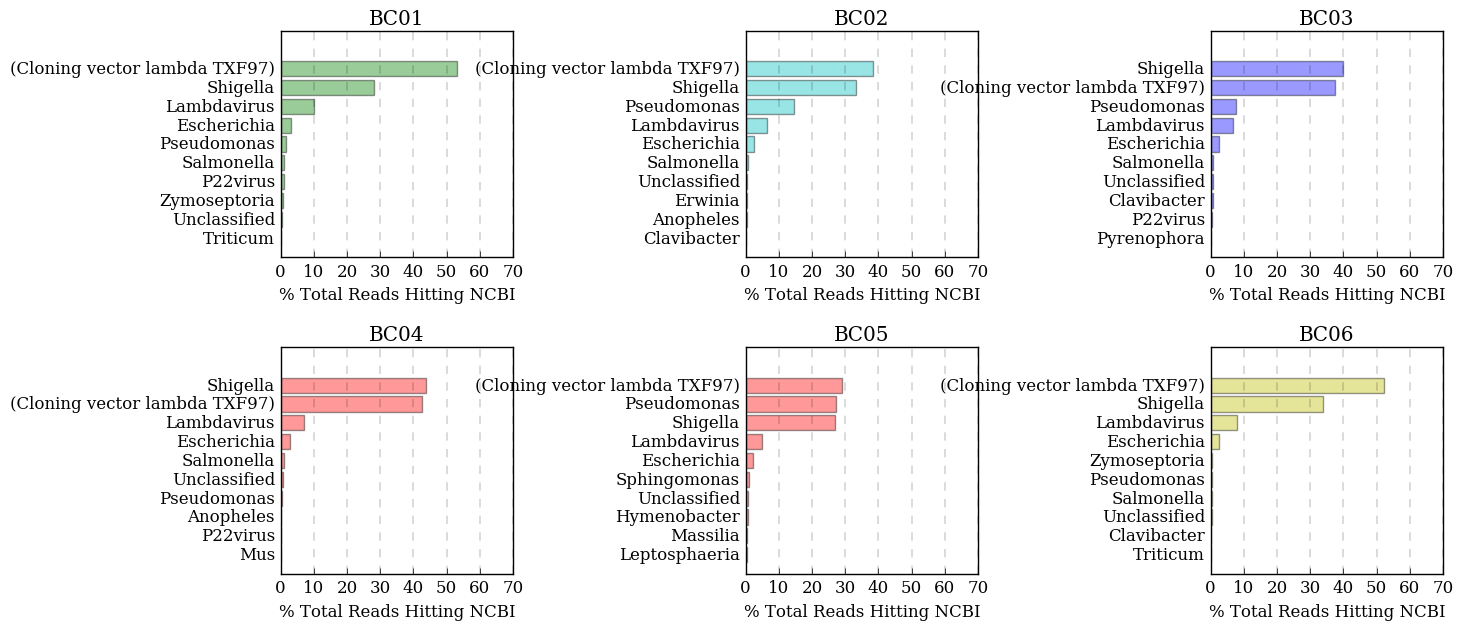

In [2207]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'

def applyPlotStyle(ax_ind1, ax_ind2, bcs, rank):
    labels = ''
    labels = tuple(generate_NCBI_taxonomy_pivot_table_pc(joint_NCBI_df_taxonomy_adj, rank, bcs)[bcs + '%'].index)
    y_pos = ''
    y_pos = np.arange(len(labels))
    sizes = ''
    sizes = tuple([float(i) for i in generate_NCBI_taxonomy_pivot_table_pc(joint_NCBI_df_taxonomy_adj, rank, bcs)[bcs + '%']])

    ax[ax_ind1, ax_ind2].barh(y_pos, sizes, align='center', alpha=0.4, color=random.choice(cycol))
    ax[ax_ind1, ax_ind2].set_yticks(y_pos)
    ax[ax_ind1, ax_ind2].set_yticklabels(labels)
    ax[ax_ind1, ax_ind2].tick_params(top="off", right="off", left="off")
    ax[ax_ind1, ax_ind2].set_xlabel('% Total Reads Hitting NCBI')
    ax[ax_ind1, ax_ind2].set_xticks(range(0, 80, 10))
    ax[ax_ind1, ax_ind2].set_title(bcs)
    ax[ax_ind1, ax_ind2].invert_yaxis()
    ax[ax_ind1, ax_ind2].grid(b=None, which='major', axis='x', linestyle='dashed', linewidth=0.2)

ax1_list = [0,0,0,1,1,1]
ax2_list = [0,1,2,0,1,2]
bc_list = ['BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'BC06']
for ax1, ax2, bcs, in zip(ax1_list, ax2_list, bc_list):
    applyPlotStyle(ax1, ax2, bcs, 'genus')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.3, hspace=0.4)
plt.show()

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [ ]:
# This for graphs to present to lab - BC01/BC06 combined as BC01, BC00/NB00 combined as NB00

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [2126]:
# % pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_NCBI_taxonomy_pivot_table_pres_pc(tax_df, rank, bcs, dropvector=False):
    """From joint_NCBI_df_taxonomy, generate a pivot table listing rank %, sorted ascending by bcs"""
    pivot_table_pc = tax_df.pivot_table(values='nident', 
                                        index=rank, 
                                        columns='barcode', 
                                        aggfunc='count', 
                                        fill_value=0, 
                                        margins=True)
    pivot_table_pc.columns.name = None
    pivot_table_pc['BC01'] = pivot_table_pc.apply(lambda row: row['BC01'] + row['BC06'], axis=1)
    pivot_table_pc.drop('BC06', axis=1, inplace=True)
    pivot_table_pc['NB00'] = pivot_table_pc.apply(lambda row: row['BC00'] + row['NB00'], axis=1)
    pivot_table_pc.drop('BC00', axis=1, inplace=True)
    
    if dropvector == True:
        pivot_table_pc.loc['All'] = pivot_table_pc.loc['All'] - pivot_table_pc.loc['(Cloning vector lambda TXF97)']
        pivot_table_pc.drop('(Cloning vector lambda TXF97)', axis=0, inplace=True)
    
    for brcs in pivot_table_pc.columns:
        pivot_table_pc[str(brcs) + '%'] = pivot_table_pc[brcs].apply(lambda x: (x / pivot_table_pc[brcs].loc['All'])*100)
    for brcs in pivot_table_pc.columns:
        if '%' not in brcs:
            pivot_table_pc.drop(brcs, axis=1, inplace=True)
    pivot_table_pc.drop('All', axis=0, inplace=True)

    pivot_table_pc2 = pivot_table_pc.sort_values(str(bcs) + '%', axis=0, ascending=False)
    return pivot_table_pc2.applymap(lambda x: '%.3f' % x).head(n=10)



In [2131]:
generate_NCBI_taxonomy_pivot_table_pres_pc(joint_NCBI_df_taxonomy_adj, 'species', 'BC04')

,BC01%,BC02%,BC03%,BC04%,BC05%,NB00%,All%
species,,,,,,,
(Cloning vector lambda TXF97),52.361,38.333,37.528,42.579,28.978,39.779,40.341
Shigella sp. PAMC 28760,31.968,31.766,38.095,41.985,25.362,33.149,34.962
Escherichia virus Lambda,6.061,4.822,5.045,5.145,3.300,3.867,4.859
Escherichia coli,2.539,2.544,2.438,2.938,2.125,6.630,2.637
Shigella flexneri,1.119,1.551,1.701,1.658,1.424,1.657,1.511
Enterobacteria phage HK629,1.829,1.236,1.077,1.486,1.401,0.552,1.441
Salmonella enterica,0.437,0.848,0.624,1.029,0.429,0.552,0.751
Anopheles gambiae,0.027,0.315,0.057,0.252,0.181,0.000,0.196
Pseudomonas poae,0.246,0.582,1.814,0.229,9.403,4.420,2.222


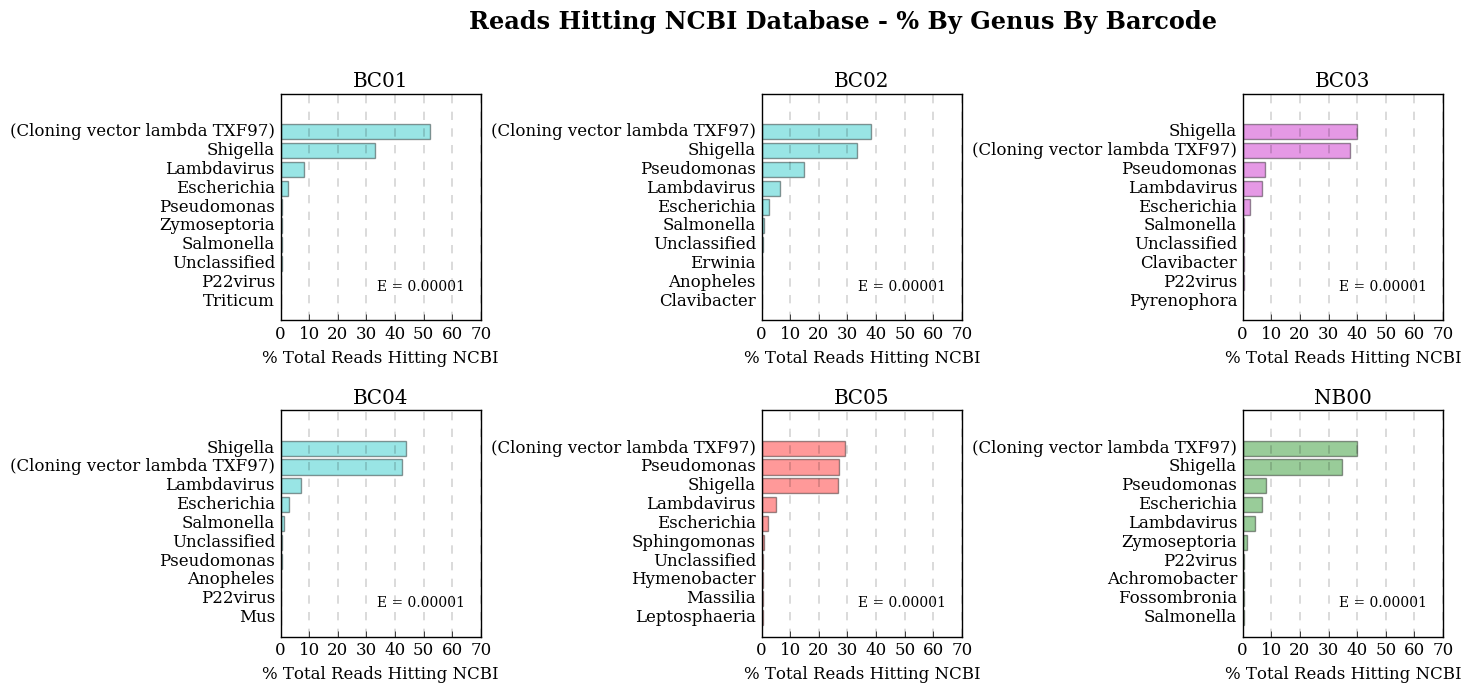

In [2241]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'

def applyPlotStylePres(ax_ind1, ax_ind2, bcs, rank):
    labels = ''
    labels = tuple(generate_NCBI_taxonomy_pivot_table_pres_pc(joint_NCBI_df_taxonomy_adj, rank, bcs)[bcs + '%'].index)
    y_pos = ''
    y_pos = np.arange(len(labels))
    sizes = ''
    sizes = tuple([float(i) for i in generate_NCBI_taxonomy_pivot_table_pres_pc(joint_NCBI_df_taxonomy_adj, rank, bcs)[bcs + '%']])

    ax[ax_ind1, ax_ind2].barh(y_pos, sizes, align='center', alpha=0.4, color=random.choice(cycol))
    ax[ax_ind1, ax_ind2].set_yticks(y_pos)
    ax[ax_ind1, ax_ind2].set_yticklabels(labels)
    ax[ax_ind1, ax_ind2].tick_params(top="off", right="off", left="off")
    ax[ax_ind1, ax_ind2].set_xlabel('% Total Reads Hitting NCBI')
    ax[ax_ind1, ax_ind2].set_xticks(range(0, 80, 10))
    ax[ax_ind1, ax_ind2].set_title(bcs)
    ax[ax_ind1, ax_ind2].invert_yaxis()
    ax[ax_ind1, ax_ind2].grid(b=None, which='major', axis='x', linestyle='dashed', linewidth=0.2)
    ax[ax_ind1, ax_ind2].annotate('E = 0.00001', 
             xy=(1.06, 0.3), xycoords='axes fraction', fontsize=10, xytext=(-20, -30), textcoords='offset points', 
             ha='right', va='bottom')
    
def generateSubplots(search_rank):
    ax1_list = [0,0,0,1,1,1]
    ax2_list = [0,1,2,0,1,2]
    bc_list = ['BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'NB00']
    for ax1, ax2, bcs, in zip(ax1_list, ax2_list, bc_list):
        applyPlotStylePres(ax1, ax2, bcs, search_rank)
    
    plt.suptitle('Reads Hitting NCBI Database - % By ' + str(search_rank).title() + ' By Barcode', 
             fontsize='x-large',
             y=1.02,
             fontweight="bold")
    
generateSubplots('genus')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.4, hspace=0.4)
#plt.savefig('/home/gamran/analysis/graph6.png', bbox_inches='tight')
plt.show()

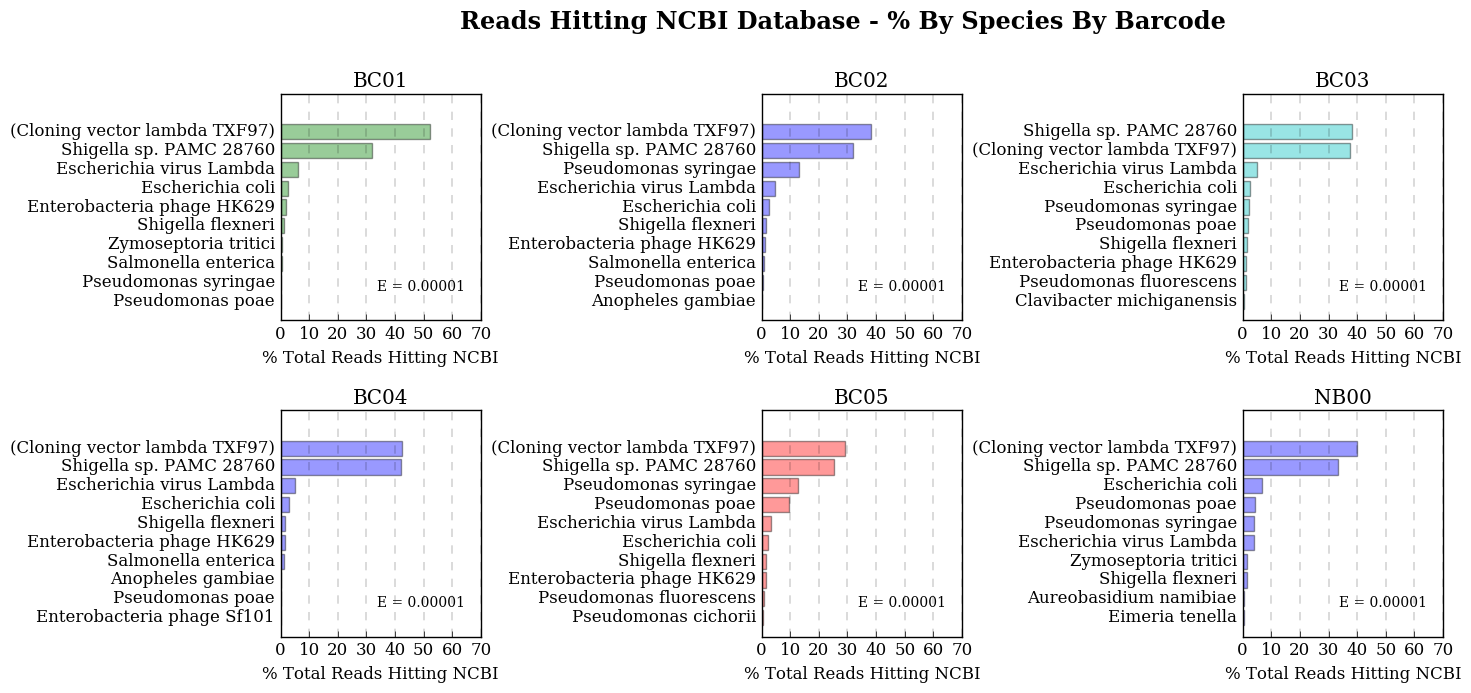

In [2243]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'
generateSubplots('species')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.4, hspace=0.4)
#plt.savefig('/home/gamran/analysis/graph7.png', bbox_inches='tight')
plt.show()

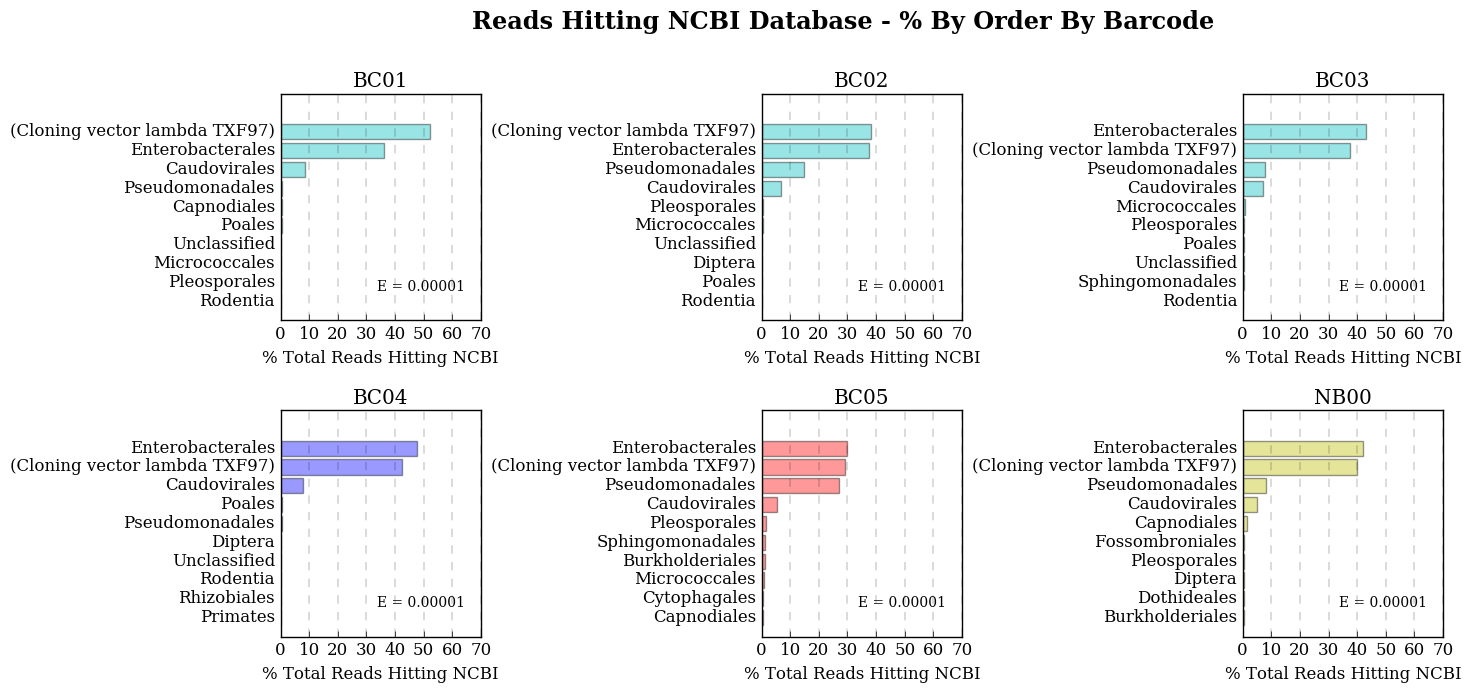

In [2245]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'
generateSubplots('order')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.4, hspace=0.4)
#plt.savefig('/home/gamran/analysis/graph8.png', bbox_inches='tight')
plt.show()

In [2133]:
# % pivot table of dataframe with taxonomic columns, including reference genomes across all ranks: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_all_hits_pc_pres_table(rank, bcs, dropwheat=False, dropvector=False):
    blast_and_NCBI_df_list = [generate_NCBI_taxonomy_pivot_table(joint_NCBI_df_taxonomy_adj, rank, bcs), 
                    blasthit_downloaded_counts]
    blast_and_NCBI_hits = pd.concat(blast_and_NCBI_df_list)
    blast_and_NCBI_hits_sum = blast_and_NCBI_hits.groupby(blast_and_NCBI_hits.index).sum()
    
    blast_and_NCBI_hits_sum['BC01'] = blast_and_NCBI_hits_sum.apply(lambda row: row['BC01'] + row['BC06'], axis=1)
    blast_and_NCBI_hits_sum.drop('BC06', axis=1, inplace=True)
    blast_and_NCBI_hits_sum['NB00'] = blast_and_NCBI_hits_sum.apply(lambda row: row['BC00'] + row['NB00'], axis=1)
    blast_and_NCBI_hits_sum.drop('BC00', axis=1, inplace=True)
    
    if dropwheat == True:
        blast_and_NCBI_hits_sum.loc['All'] = blast_and_NCBI_hits_sum.loc['All'] - blast_and_NCBI_hits_sum.loc['Wheat']
        blast_and_NCBI_hits_sum.drop('Wheat', axis=0, inplace=True)
    
    if dropvector == True:
        blast_and_NCBI_hits_sum.loc['All'] = blast_and_NCBI_hits_sum.loc['All'] - blast_and_NCBI_hits_sum.loc['(Cloning vector lambda TXF97)']
        blast_and_NCBI_hits_sum.drop('(Cloning vector lambda TXF97)', axis=0, inplace=True)
    
    for brcs in blast_and_NCBI_hits_sum.columns:
        blast_and_NCBI_hits_sum[str(brcs) + '%'] = blast_and_NCBI_hits_sum[brcs].apply(lambda x: (x / blast_and_NCBI_hits_sum[brcs].loc['All'])*100)
    for brcs in blast_and_NCBI_hits_sum.columns:
        if '%' not in brcs:
            blast_and_NCBI_hits_sum.drop(brcs, axis=1, inplace=True)
    blast_and_NCBI_hits_sum.drop('All', axis=0, inplace=True)
    
    blast_and_NCBI_hits_sum2 = blast_and_NCBI_hits_sum.sort_values(str(bcs) + '%', axis=0, ascending=False)
    return blast_and_NCBI_hits_sum2.applymap(lambda x: '%.3f' % x).head(n=10)

generate_all_hits_pc_pres_table('species', 'BC01', dropwheat=False, dropvector=True)

,BC01%,BC02%,BC03%,BC04%,BC05%,NB00%,All%
species,,,,,,,
Wheat,96.488,96.296,93.145,96.401,94.847,95.945,95.834
Zymoseptoria tritici,1.619,0.018,0.033,0.017,0.988,0.382,0.514
Shigella sp. PAMC 28760,1.269,1.239,1.697,2.615,1.341,1.763,1.721
Escherichia virus Lambda,0.241,0.188,0.225,0.320,0.174,0.206,0.239
Escherichia coli,0.101,0.099,0.109,0.183,0.112,0.353,0.130
Enterobacteria phage HK629,0.073,0.048,0.048,0.093,0.074,0.029,0.071
Shigella flexneri,0.044,0.060,0.076,0.103,0.075,0.088,0.074
Salmonella enterica,0.017,0.033,0.028,0.064,0.023,0.029,0.037
Pseudomonas poae,0.010,0.023,0.081,0.014,0.497,0.235,0.109


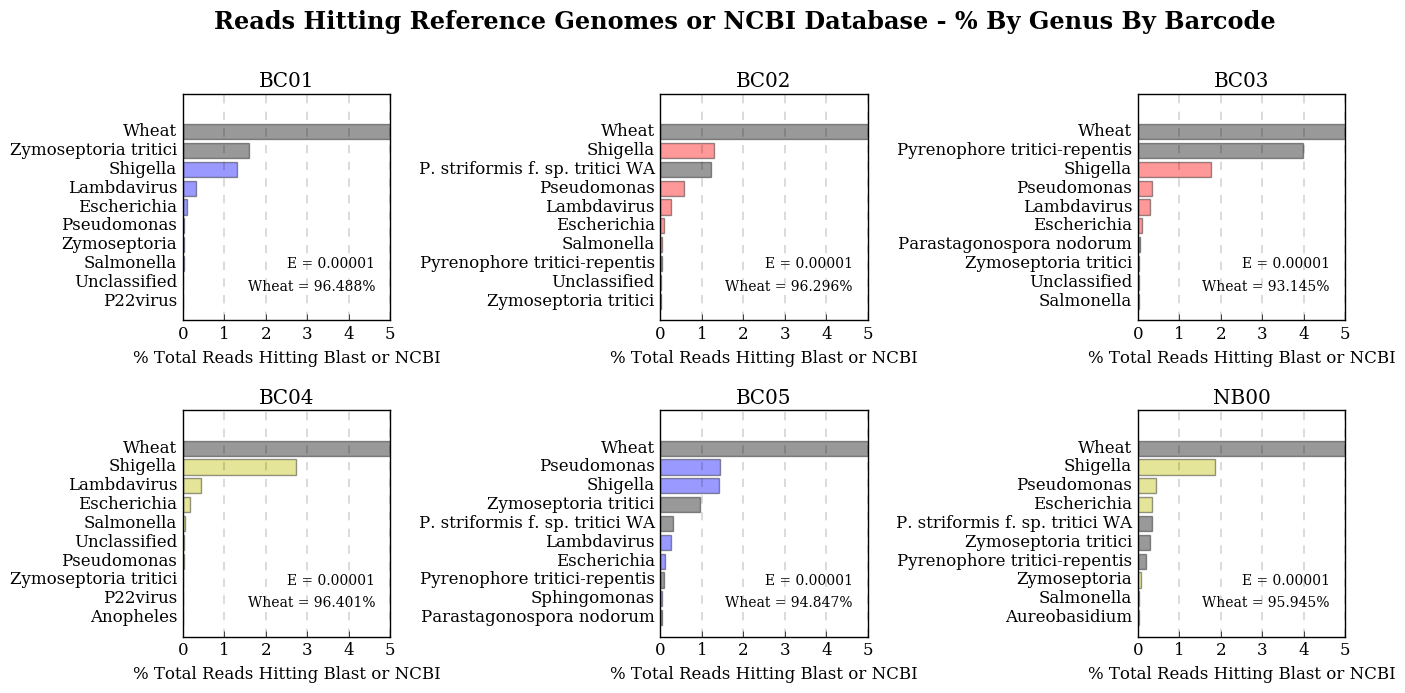

In [2246]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'

def applyPlotStylePres(ax_ind1, ax_ind2, bcs, rank):
    cycol_one = ''
    cycol_one = random.choice(cycol)
    labels = ''
    labels = tuple(generate_all_hits_pc_pres_table(rank, bcs, dropwheat=False, dropvector=True)[bcs + '%'].index)
    y_pos = ''
    y_pos = np.arange(len(labels))
    sizes = ''
    sizes = tuple([float(i) for i in generate_all_hits_pc_pres_table(rank, bcs, dropwheat=False, dropvector=True)[bcs + '%']])

    colors = []
    for name in labels:
        if name in list(blasthit_downloaded_counts.index):
            colors.append('k')
        else:
            colors.append(cycol_one)
    
    ax[ax_ind1, ax_ind2].barh(y_pos, sizes, align='center', alpha=0.4, color=colors)
    ax[ax_ind1, ax_ind2].set_yticks(y_pos)
    ax[ax_ind1, ax_ind2].set_yticklabels(labels)
    ax[ax_ind1, ax_ind2].tick_params(top="off", right="off", left="off")
    ax[ax_ind1, ax_ind2].set_xlim([0, 5])
    ax[ax_ind1, ax_ind2].set_xlabel('% Total Reads Hitting Blast or NCBI')
    ax[ax_ind1, ax_ind2].set_xticks(range(0, 6, 1))
    ax[ax_ind1, ax_ind2].set_title(bcs)
    ax[ax_ind1, ax_ind2].invert_yaxis()
    ax[ax_ind1, ax_ind2].grid(b=None, which='major', axis='x', linestyle='dashed', linewidth=0.2)
    ax[ax_ind1, ax_ind2].annotate('Wheat = ' + str(sizes[0]) + '%', 
             xy=(1.06, 0.3), xycoords='axes fraction', fontsize=10, xytext=(-20, -30), textcoords='offset points', 
             ha='right', va='bottom')
    ax[ax_ind1, ax_ind2].annotate('E = 0.00001', 
             xy=(1.06, 0.4), xycoords='axes fraction', fontsize=10, xytext=(-20, -30), textcoords='offset points', 
             ha='right', va='bottom')

def generateSubplots(rank):
    ax1_list = [0,0,0,1,1,1]
    ax2_list = [0,1,2,0,1,2]
    bc_list = ['BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'NB00']
    for ax1, ax2, bcs, in zip(ax1_list, ax2_list, bc_list):
        applyPlotStylePres(ax1, ax2, bcs, rank)
    plt.suptitle('Reads Hitting Reference Genomes or NCBI Database - % By ' + str(rank).title() + ' By Barcode', 
             fontsize='x-large',
             y=1.02,
             fontweight="bold")
    
generateSubplots('genus')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.3, hspace=0.4)
#plt.savefig('/home/gamran/analysis/graph9.png', bbox_inches='tight')
plt.show()

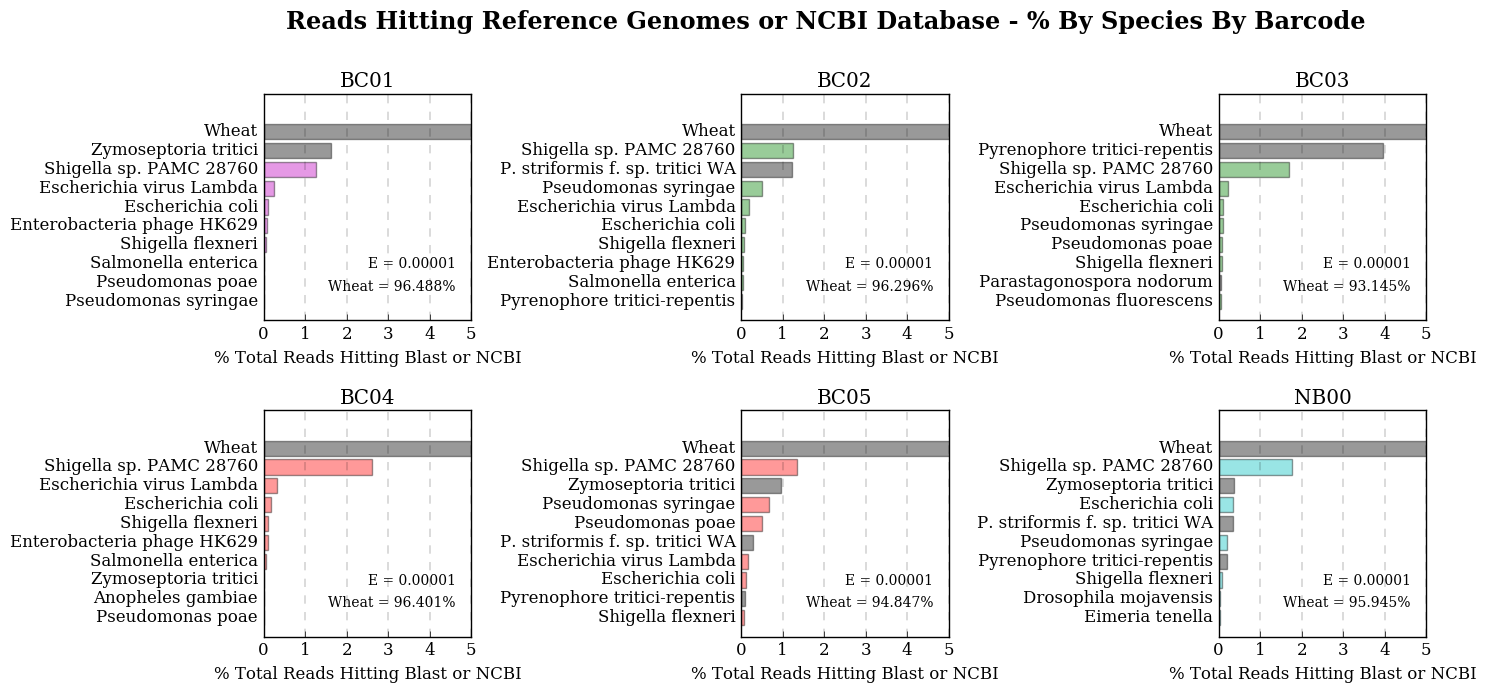

In [2247]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'
generateSubplots('species')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.3, hspace=0.4)
#plt.savefig('/home/gamran/analysis/graph10.png', bbox_inches='tight')
plt.show()

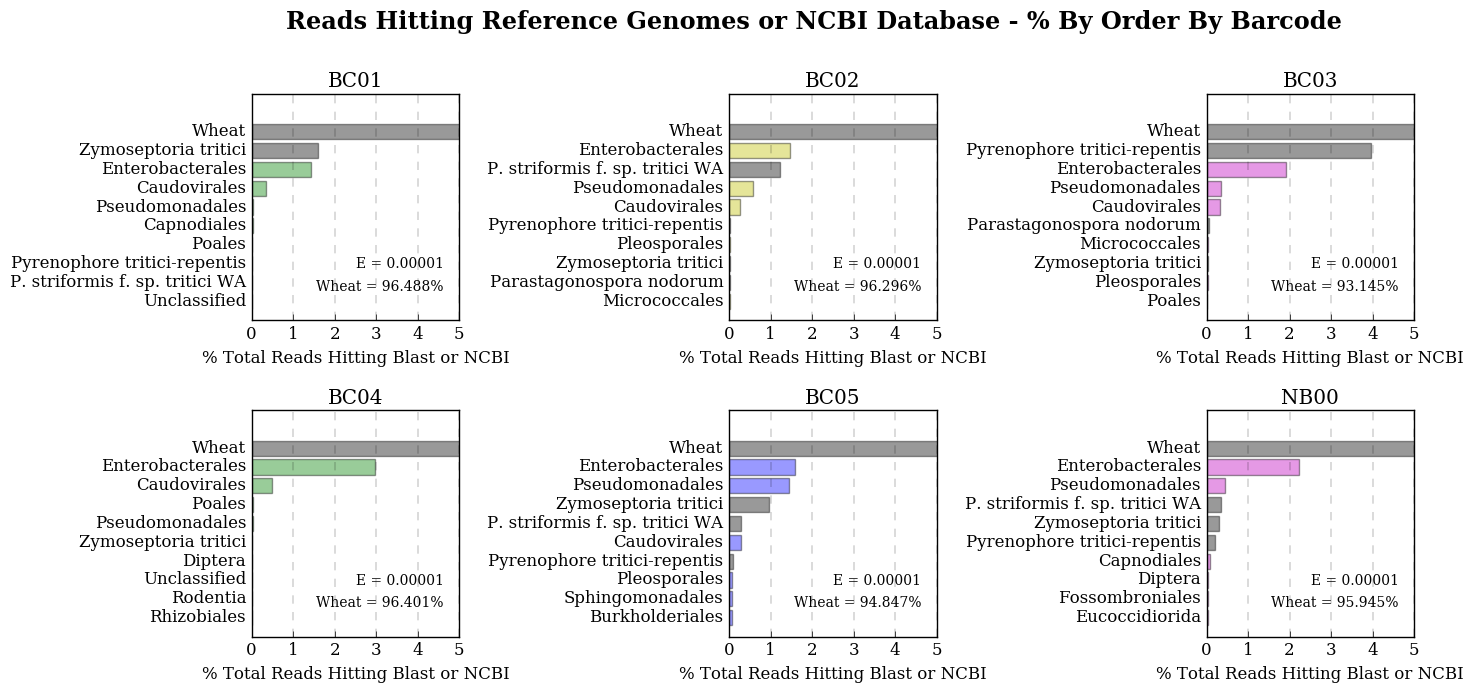

In [2248]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
cycol = 'bgrcmy'
generateSubplots('order')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.3, hspace=0.4)
#plt.savefig('/home/gamran/analysis/graph11.png', bbox_inches='tight')
plt.show()

In [2182]:
#IMPORTED COUNTS FOR READS HITTING TO REFERENCE GENOMES
os.chdir('/home/gamran/analysis')
blastnohit_downloaded_counts = pd.read_csv('test2.csv', index_col=0)
blastnohit_downloaded_counts2 = blastnohit_downloaded_counts.transpose()

In [2187]:
blastnohit_downloaded_counts_pivot_table = joint_NCBI_df.pivot_table(values='nident',
                                            index='barcode', 
                                            aggfunc='count', 
                                            fill_value=0, 
                                            margins=True)

blastnohit_ncbi_counts = pd.concat([blastnohit_downloaded_counts2, blastnohit_downloaded_counts_pivot_table], 
          axis=1, 
          join_axes=[blastnohit_downloaded_counts2.index])
blastnohit_ncbi_counts = blastnohit_ncbi_counts.rename(columns={'BlastedNoHit_n': 'BlastedNoHit_n', 
                                                                'nident': 'BlastedNoHitNCBIHit_n'})

In [2190]:
blastnohit_ncbi_counts['BlastedNoHitNoNCBIHit_n'] = blastnohit_ncbi_counts['BlastedNoHit_n'] - blastnohit_ncbi_counts['BlastedNoHitNCBIHit_n']

In [2194]:
blastnohit_ncbi_counts2 = blastnohit_ncbi_counts.applymap(lambda x: int(x))

In [2196]:
blastnohit_ncbi_counts2['BlastedNoHitNCBIHit_%'] = np.round((blastnohit_ncbi_counts2['BlastedNoHitNCBIHit_n'] / blastnohit_ncbi_counts2['BlastedNoHit_n'] * 100), 3)
blastnohit_ncbi_counts2['BlastedNoHitNoNCBIHit_%'] = np.round((blastnohit_ncbi_counts2['BlastedNoHitNoNCBIHit_n'] / blastnohit_ncbi_counts2['BlastedNoHit_n'] * 100), 3)


In [2198]:
blastnohit_ncbi_counts2_noall = blastnohit_ncbi_counts2.drop('All')

In [2199]:
blastnohit_ncbi_counts2_noall

,BlastedNoHit_n,BlastedNoHitNCBIHit_n,BlastedNoHitNoNCBIHit_n,BlastedNoHitNCBIHit_%,BlastedNoHitNoNCBIHit_%
BC01,39775,451,39324,1.134,98.866
BC02,12513,4127,8386,32.982,67.018
BC03,3307,1764,1543,53.341,46.659
BC04,12287,8746,3541,71.181,28.819
BC05,7859,4424,3435,56.292,43.708
NB00,5724,47,5677,0.821,99.179


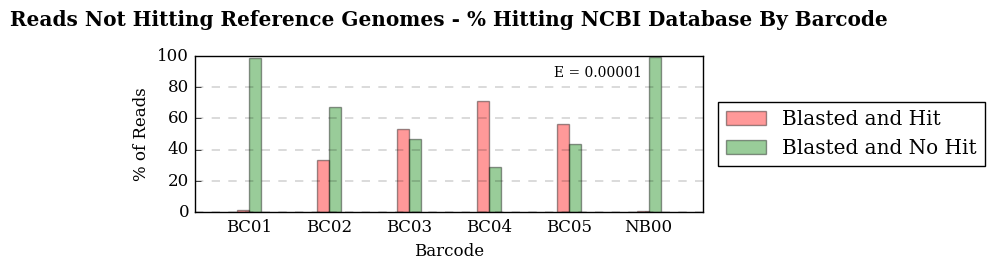

In [2238]:
n_groups = len(blastnohit_ncbi_counts2_noall.index.values)

count_blastedhit = tuple(blastnohit_ncbi_counts2_noall['BlastedNoHitNCBIHit_%'])
count_blastednohit = tuple(blastnohit_ncbi_counts2_noall['BlastedNoHitNoNCBIHit_%'])

fig, ax = plt.subplots(figsize=(8,3))

index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.4

rects1 = plt.bar(index, count_blastedhit, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Blasted and Hit')

rects2 = plt.bar(index + bar_width, count_blastednohit, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Blasted and No Hit')
plt.annotate('E = 0.00001', 
             xy=(0.88, 0.85), xycoords='axes fraction', fontsize=10, xytext=(0, 0), textcoords='offset points', 
             ha='right', va='bottom', fontweight='normal')
plt.xlabel('Barcode')
plt.ylabel('% of Reads')
plt.title('Reads Not Hitting Reference Genomes - % Hitting NCBI Database By Barcode', y=1.15, fontweight='bold', fontsize='large')
plt.xticks(index + bar_width, tuple(blastnohit_ncbi_counts2_noall.index.values), y=-0.01)
plt.tick_params(top="off", right="off", bottom="off")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=8, prop={'weight':'normal'})
plt.grid(b=None, which='major', axis='y', linestyle='dashed', linewidth=0.2)
plt.margins(x=0.1)

plt.tight_layout()
#plt.savefig('/home/gamran/analysis/graph5.png', bbox_inches='tight')
plt.show()

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [ ]:
# These are functions used to figure out how to classify everything according to taxonomic rank

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [ ]:
##############################################################################################

In [474]:
#Number of unique tax ids per barcode in the joint_NCBI_pivot_table
tax_id_barcode_len_list = []
for bcs in joint_NCBI_pivot_table_names.columns:
    print(bcs, ' = ', len(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == bcs].staxids.unique()))
    tax_id_barcode_len_list.append(len(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == bcs].staxids.unique()))

#Sum of unique tax ids per barcode in the joint_NCBI_pivot_table
print('All - Unique Per Barcode = ', sum(tax_id_barcode_len_list))
    
#No of unique tax ids across entire joint_NCBI_pivot_table
print('All - Unique Across Dataframe = ', len(list(set(joint_NCBI_df.staxids))))



BC00  =  14
BC01  =  23
BC02  =  151
BC03  =  124
BC04  =  115
BC05  =  270
BC06  =  81
NB00  =  14
All  =  0
All - Unique Per Barcode =  792
All - Unique Across Dataframe =  560


In [429]:
#Generates a dictionary assigning key: barcode, value: list of unique tax ids for each barcode
bcs_staxids_dict = {}
for bcs in joint_NCBI_pivot_table_names.columns:
    bcs_staxids_dict[bcs] = list(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == bcs].staxids.unique())
del bcs_staxids_dict['All']
#bcs_staxids_dict.keys()

['43300',
 '1813821',
 '1524881',
 '31964',
 '7165',
 '10710',
 '1324932',
 '1147148',
 '199201',
 '1357279',
 '374923',
 '294',
 '587753',
 '562',
 '1147146',
 '910348',
 '9606',
 '405955',
 '38735',
 '357240',
 '37554',
 '1147786',
 '749889',
 '1282356',
 '1785145',
 '1332075',
 '634500',
 '574521',
 '1484157',
 '1028989',
 '54291',
 '227321',
 '4555',
 '264483',
 '595496',
 '568708',
 '665912',
 '930166',
 '1047171',
 '37762',
 '101618',
 '1114970',
 '1609977',
 '443906',
 '33014',
 '90371',
 '157739',
 '1287680',
 '634499',
 '1097668',
 '671987',
 '432200',
 '205918',
 '465817',
 '317',
 '321',
 '509925',
 '198628',
 '225338',
 '10761',
 '215689',
 '41514',
 '1649877',
 '264730',
 '1274814',
 '199310',
 '480178',
 '10090',
 '539221',
 '906668',
 '1441629',
 '1324931',
 '208963',
 '716540',
 '223283',
 '573235',
 '406716',
 '4565',
 '85698',
 '1692238',
 '1147145',
 '861557',
 '28447',
 '157783',
 '1028729',
 '889211',
 '578455',
 '225343',
 '1415630',
 '1221522',
 '37682',
 '149533

In [556]:
#Determining which barcodes have unique tax id lists with multiples
def find_mult_staxids(bcs):
    """Function to determine whether a list of unique tax ids contains a multiple e.g. taxid1;taxid2"""
    for staxids_index in range(0, len(bcs_staxids_dict[bcs])):
        if ';' in str(bcs_staxids_dict[bcs][staxids_index]):
            print(bcs_staxids_dict[bcs][staxids_index])
            print(bcs_staxids_dict[bcs].index(bcs_staxids_dict[bcs][staxids_index]))
            print(bcs)
            print()
            
for bcs in sorted(list(bcs_staxids_dict.keys())):
    find_mult_staxids(bcs)

225338;985895
100
BC02

5266;5298;5301
107
BC04

225338;985895
84
BC05

97479;861557
192
BC05



In [608]:
#Generates a dictionary assigning key: barcode, value: lineage corresponding to each unique tax id for each barcode
def generate_bcs_lineage_list(bcs):
    """Generates a value (lineage list for staxids in a specific barcode), 
       assigns to key (barcode) in a dictionary (bcs_lineage_dict)"""
    lineage_list = []
    for staxids in list(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == bcs].staxids.unique()):
        if ';' in str(staxids):
            staxids = staxids.split(';')[0] #for taxids in multiples, splits and only takes first one
        lineage = ''
        lineage = ncbi.get_lineage(staxids)
        lineage_list.append(list(lineage))
    bcs_lineage_dict[bcs] = lineage_list
    
bcs_lineage_dict = {}
for bcs in joint_NCBI_pivot_table_names.columns:
    generate_bcs_lineage_list(bcs)
del bcs_lineage_dict['All']

In [613]:
#Generates a dictionary assigning key: barcode, value: lineage names corresponding to each unique tax id for each barcode
def generate_bcs_lineage_names_list(bcs):
    """Generates a value (lineage names list for staxids in a specific barcode), 
       assigns to key (barcode) in a dictionary (bcs_lineage_names_dict)"""
    lineage_names_list = []
    for staxids in list(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == bcs].staxids.unique()):
        if ';' in str(staxids):
            staxids = staxids.split(';')[0]
        lineage = ''
        lineage = ncbi.get_lineage(staxids)
        names = ''
        names = ncbi.get_taxid_translator(lineage)
        names_taxid = [names[taxid] for taxid in lineage]
        lineage_names_list.append(list(names_taxid))
    bcs_lineage_names_dict[bcs] = lineage_names_list
    
bcs_lineage_names_dict = {}
for bcs in joint_NCBI_pivot_table_names.columns:
    generate_bcs_lineage_names_list(bcs)
del bcs_lineage_names_dict['All']

In [724]:
#Generates a dictionary assigning key: barcode, value: lineage ranks corresponding to each unique tax id for each barcode
def generate_bcs_lineage_ranks_list(bcs):
    """Generates a value (lineage ranks list for staxids in a specific barcode), 
       assigns to key (barcode) in a dictionary (bcs_lineage_names_dict)"""
    lineage_ranks_list = []
    for staxids in list(joint_NCBI_df.loc[joint_NCBI_df['barcode'] == bcs].staxids.unique()):
        if ';' in str(staxids):
            staxids = staxids.split(';')[0]
        lineage = ''
        lineage = ncbi.get_lineage(staxids)
        ranks = ''
        ranks = ncbi.get_rank(lineage)
        ranks_taxid = [ranks[taxid] for taxid in lineage]
        lineage_ranks_list.append(list(ranks_taxid))
    bcs_lineage_ranks_dict[bcs] = lineage_ranks_list

bcs_lineage_ranks_dict = {}
for bcs in joint_NCBI_pivot_table_names.columns:
    generate_bcs_lineage_ranks_list(bcs)
del bcs_lineage_ranks_dict['All']

In [1074]:
#Generates a dictionary assigning key: barcode, value: list [lineage names, taxonomic ranks] corresponding to each unique tax id for each barcode
def generate_bcs_lineage_names2ranks_list(bcs):
    """Generates a value ( [lineage names, ranks] list for staxids in a specific barcode), 
       assigns to key (barcode) in a dictionary (bcs_lineage_names_dict)"""    
    lineage_names2ranks_list = []
    for lineage_index in range(0, len(bcs_lineage_names_dict[bcs])):
        names = ''
        names = bcs_lineage_names_dict[bcs][lineage_index]
        ranks = ''
        ranks = bcs_lineage_ranks_dict[bcs][lineage_index]
        names2ranks = [tuple(x) for x in zip(names, ranks)]
        lineage_names2ranks_list.append(names2ranks)
    bcs_lineage_names2ranks_dict[bcs] = lineage_names2ranks_list
    
bcs_lineage_names2ranks_dict = {}
for bcs in joint_NCBI_pivot_table_names.columns:
    generate_bcs_lineage_names2ranks_list(bcs)
    

In [872]:
#Adds a correct 'All' categories to the above dictionaries
lineage_list = []
lineage_names_list = []
lineage_ranks_list = []
unique_staxids = joint_NCBI_df['staxids'].unique()

for staxids in unique_staxids:
    if ';' in str(staxids):
            staxids = staxids.split(';')[0]
    lineage = ''
    lineage = ncbi.get_lineage(staxids)
    lineage_list.append(list(lineage))
    
    names = ''
    names = ncbi.get_taxid_translator(lineage)
    names_taxid = [names[taxid] for taxid in lineage]
    lineage_names_list.append(list(names_taxid))
    
    ranks = ncbi.get_rank(lineage)
    ranks_taxid = [ranks[taxid] for taxid in lineage]
    lineage_ranks_list.append(list(ranks_taxid))

#Why are some in quotes (strings) and some are not???
bcs_staxids_dict['All'] = list(joint_NCBI_df['staxids'].unique()) #Note: 'All' contains the taxid multiples, the others don't
bcs_lineage_dict['All'] = lineage_list
bcs_lineage_names_dict['All'] = lineage_names_list
bcs_lineage_ranks_dict['All'] = lineage_ranks_list

In [979]:
bcs_lineage_ranks_dict['All']

[['no rank',
  'no rank',
  'superkingdom',
  'phylum',
  'class',
  'order',
  'family',
  'genus',
  'species'],
 ['no rank', 'no rank', 'no rank', 'no rank', 'species'],
 ['no rank', 'superkingdom', 'no rank', 'order', 'family', 'genus', 'species'],
 ['no rank',
  'no rank',
  'superkingdom',
  'phylum',
  'class',
  'order',
  'family',
  'genus',
  'species group',
  'species',
  'no rank'],
 ['no rank',
  'no rank',
  'superkingdom',
  'phylum',
  'class',
  'order',
  'family',
  'genus',
  'species',
  'no rank'],
 ['no rank',
  'no rank',
  'superkingdom',
  'phylum',
  'class',
  'order',
  'family',
  'genus',
  'species group',
  'species subgroup',
  'species',
  'no rank',
  'no rank'],
 ['no rank',
  'no rank',
  'superkingdom',
  'no rank',
  'kingdom',
  'subkingdom',
  'phylum',
  'no rank',
  'subphylum',
  'no rank',
  'no rank',
  'class',
  'subclass',
  'order',
  'family',
  'genus',
  'species'],
 ['no rank',
  'no rank',
  'superkingdom',
  'phylum',
  'class'

In [1570]:
bcs_lineage_names2ranks_dict['BC00'][3]

[('root', 'no rank'),
 ('cellular organisms', 'no rank'),
 ('Bacteria', 'superkingdom'),
 ('Proteobacteria', 'phylum'),
 ('Gammaproteobacteria', 'class'),
 ('Pseudomonadales', 'order'),
 ('Pseudomonadaceae', 'family'),
 ('Pseudomonas', 'genus'),
 ('Pseudomonas fluorescens group', 'species group'),
 ('Pseudomonas poae', 'species'),
 ('Pseudomonas poae RE*1-1-14', 'no rank')]

In [916]:
#Checks for code working, all should be the same length
#print(len(bcs_staxids_dict['BC05']))
#print(len(bcs_lineage_dict['BC05']))
#print(len(bcs_lineage_names_dict['BC05']))
#print(len(bcs_lineage_ranks_dict['BC05']))
#print(len(bcs_lineage_names2ranks_dict['BC05']))

In [1151]:
#Trying to find discern all the available taxonomic ranks used across the NCBI dataframe
unique_rank_list = []
for unique_id in range(0, len(bcs_lineage_names2ranks_dict['All'])):
    for lineages in bcs_lineage_names2ranks_dict['All'][unique_id]:
        unique_rank_list.append(lineages[1])
print(sorted(list(set(unique_rank_list))))

['class', 'family', 'forma', 'genus', 'infraclass', 'infraorder', 'kingdom', 'no rank', 'order', 'parvorder', 'phylum', 'species', 'species group', 'species subgroup', 'subclass', 'subfamily', 'subgenus', 'subkingdom', 'suborder', 'subphylum', 'subspecies', 'subtribe', 'superclass', 'superfamily', 'superkingdom', 'superorder', 'tribe', 'varietas']


In [1185]:
#Determining what unique staxids contain or do not contain a certain taxonomic rank
def check_rank_in_taxids(rank_name, dict_w_key, rank_present=True):
    """Given a dictionary value listing lineages (dict_w_key) and a specific taxonomic rank
       to search (rank_name), find lineages with or without the specific rank and their index"""
    for unique_id in range(0, len(dict_w_key)):
        if rank_present == True:
            if rank_name in [pairs for lineages in dict_w_key[unique_id] for pairs in lineages]:
                print('Yes!', unique_id, dict_w_key[unique_id])
                print()
            else:
                None
        if rank_present == False:
            if rank_name in [pairs for lineages in dict_w_key[unique_id] for pairs in lineages]:
                None
            else:
                print('No!', unique_id, dict_w_key[unique_id])
                print()

In [1571]:
check_rank_in_taxids('Viruses', bcs_lineage_names2ranks_dict['All'], rank_present=True)

Yes! 2 [('root', 'no rank'), ('Viruses', 'superkingdom'), ('dsDNA viruses, no RNA stage', 'no rank'), ('Caudovirales', 'order'), ('Siphoviridae', 'family'), ('Lambdavirus', 'genus'), ('Escherichia virus Lambda', 'species')]

Yes! 11 [('root', 'no rank'), ('Viruses', 'superkingdom'), ('dsDNA viruses, no RNA stage', 'no rank'), ('Caudovirales', 'order'), ('Siphoviridae', 'family'), ('Lambdavirus', 'genus'), ('unclassified Lambda-like viruses', 'no rank'), ('Enterobacteria phage HK629', 'species')]

Yes! 12 [('root', 'no rank'), ('Viruses', 'superkingdom'), ('dsDNA viruses, no RNA stage', 'no rank'), ('Caudovirales', 'order'), ('Podoviridae', 'family'), ('P22virus', 'genus'), ('unclassified P22likevirus', 'no rank'), ('Salmonella phage epsilon34', 'species')]

Yes! 15 [('root', 'no rank'), ('Viruses', 'superkingdom'), ('dsDNA viruses, no RNA stage', 'no rank'), ('Caudovirales', 'order'), ('Siphoviridae', 'family'), ('unclassified Siphoviridae', 'no rank'), ('Enterobacteria phage HK542', '

In [1191]:
#Prints several taxonomic ranks that follow the one specified, none if rank doesn't exist
for lists in bcs_lineage_names_dict['All']:
    if 'Viruses' in lists:
        n1 = 2
        n2 = 3
        n3 = 4
        n4 = 5
        print(lists[-1], '', end="")
        print('| Ranks = ', len(lists))
        print(lists[n1], ', ', end="") if n1 < len(lists) else print('N/A')
        print(lists[n2], ', ', end="") if n2 < len(lists) else print('N/A')
        print(lists[n3], ', ', end="") if n3 < len(lists) else print('N/A')
        print(lists[n4]) if n4 < len(lists) else print('N/A')
        print()

Escherichia virus Lambda | Ranks =  7
dsDNA viruses, no RNA stage , Caudovirales , Siphoviridae , Lambdavirus

Enterobacteria phage HK629 | Ranks =  8
dsDNA viruses, no RNA stage , Caudovirales , Siphoviridae , Lambdavirus

Salmonella phage epsilon34 | Ranks =  8
dsDNA viruses, no RNA stage , Caudovirales , Podoviridae , P22virus

Enterobacteria phage HK542 | Ranks =  7
dsDNA viruses, no RNA stage , Caudovirales , Siphoviridae , unclassified Siphoviridae

Enterobacteria phage CUS-3 | Ranks =  8
dsDNA viruses, no RNA stage , Caudovirales , Podoviridae , P22virus

Shigella phage Sf6 | Ranks =  7
dsDNA viruses, no RNA stage , Caudovirales , Podoviridae , P22virus

Enterobacteria phage Sf101 | Ranks =  7
dsDNA viruses, no RNA stage , Caudovirales , Podoviridae , unclassified Podoviridae

Escherichia virus Lambda | Ranks =  7
dsDNA viruses, no RNA stage , Caudovirales , Siphoviridae , Lambdavirus

Enterobacteria phage HK629 | Ranks =  8
dsDNA viruses, no RNA stage , Caudovirales , Siphoviri

In [1086]:
#If the unique id has a certain set upper rank, print lower rank
def if_upper_print_lower(upr_ind, upr_rnk, lwr_ind, dict_w_key):
    for unique_id in range(0, len([x[upr_ind] for x in dict_w_key])):
        if [x[upr_ind] for x in dict_w_key][unique_id] == upr_rnk:
            print([x[lwr_ind] for x in dict_w_key][unique_id])
        else:
            print('Not ' + upr_rnk)

print(set([x[3] for x in bcs_lineage_names_dict['All']]))            
print()
if_upper_print_lower(2, 'Eukaryota', 3, bcs_lineage_names_dict['All'])

{'FCB group', 'vectors', 'Euglenozoa', 'Viridiplantae', 'uncultured microorganism', 'Stramenopiles', 'Proteobacteria', 'environmental samples', 'Baculoviridae', 'Opisthokonta', 'Caudovirales', 'Amoebozoa', 'Spirochaetes', 'Plasmid ColE1', 'unclassified Bacteria', 'Terrabacteria group', 'Alveolata'}

Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Opisthokonta
Not Eukaryota
Not Eukaryota
Not Eukaryota
Opisthokonta
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Viridiplantae
Opisthokonta
Opisthokonta
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
environmental samples
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Opisthokonta
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Not Eukaryota
Opisthokonta
Not Eukaryota
Viridiplantae
Not Eukaryota
Not Eukaryota
Not Eukaryota
Opisthokont

In [1172]:
#Shows all available lineage entries per index - not regular e.g. superkingdom, phylum, need another way...
#set([x[2] for x in bcs_lineage_names2ranks_dict['All']])

{('Bacteria', 'superkingdom'),
 ('Eukaryota', 'superkingdom'),
 ('artificial sequences', 'no rank'),
 ('dsDNA viruses, no RNA stage', 'no rank'),
 ('environmental samples', 'no rank'),
 ('plasmids', 'no rank')}

In [1451]:
#Shows all available species in the NCBI dataframe
species_list = []
for lineages in bcs_lineage_names2ranks_dict['All']:
    for ranks in lineages:
        if 'species' in ranks:
            species_list.append(ranks)
set(species_list)

365

In [1319]:
#joint_NCBI_df.head(n=10)

,qseqid,sseqid,evalue,bitscore,length,pident,nident,sgi,sacc,staxids,sscinames,scomnames,sskingdoms,barcode
0,b694e6b0-be3f-41d4-a1ac-960beaa1e3cd_Basecall_...,gi|1008889473|gb|CP014768.1|,0.000000e+00,1618.0,1512,87.37,1321,1008889473,CP014768,1813821,Shigella sp. PAMC 28760,Shigella sp. PAMC 28760,Bacteria,BC00
1,3e9eaf56-497e-4892-b9e2-b28700044e69_Basecall_...,gi|1051181|gb|U37692.1|CVU37692,0.000000e+00,1792.0,2255,83.15,1875,1051181,U37692,43300,Cloning vector lambda TXF97,Cloning vector lambda TXF97,NaN,BC00
2,3fc3a37e-0151-4ec6-95c9-312e779bd514_Basecall_...,gi|1051181|gb|U37692.1|CVU37692,0.000000e+00,1195.0,1155,86.84,1003,1051181,U37692,43300,Cloning vector lambda TXF97,Cloning vector lambda TXF97,NaN,BC00
3,400652b7-6dff-49de-bf65-1847b08fbffb_Basecall_...,gi|215104|gb|J02459.1|LAMCG,0.000000e+00,3369.0,2587,91.15,2358,215104,J02459,10710,Enterobacteria phage lambda,Enterobacteria phage lambda,Viruses,BC00
4,41c35e20-2205-405b-adab-75132600e591_Basecall_...,gi|1051181|gb|U37692.1|CVU37692,0.000000e+00,1297.0,1373,85.14,1169,1051181,U37692,43300,Cloning vector lambda TXF97,Cloning vector lambda TXF97,NaN,BC00
5,4248f4fe-34e0-4ce5-ade8-d05002a3058d_Basecall_...,gi|445198867|gb|CP004045.1|,0.000000e+00,1327.0,1402,85.24,1195,445198867,CP004045,1282356,Pseudomonas poae RE*1-1-14,Pseudomonas poae RE*1-1-14,Bacteria,BC00
6,4616a9eb-c856-4803-9e74-de9c48ca4486_Basecall_...,gi|1008889473|gb|CP014768.1|,0.000000e+00,1044.0,896,89.06,798,1008889473,CP014768,1813821,Shigella sp. PAMC 28760,Shigella sp. PAMC 28760,Bacteria,BC00
7,4902fe2e-72ea-4eb4-ad5c-51dd2d7d1e67_Basecall_...,gi|1051181|gb|U37692.1|CVU37692,0.000000e+00,1537.0,1757,84.18,1479,1051181,U37692,43300,Cloning vector lambda TXF97,Cloning vector lambda TXF97,NaN,BC00
8,492645b7-63c1-42ca-a901-ebe6a6643870_Basecall_...,gi|1051181|gb|U37692.1|CVU37692,0.000000e+00,743.0,1529,77.50,1185,1051181,U37692,43300,Cloning vector lambda TXF97,Cloning vector lambda TXF97,NaN,BC00
9,49fb902b-070e-4e76-b158-f15952ed933e_Basecall_...,gi|1002167280|gb|CP012733.1|,4.000000e-56,230.0,210,87.62,184,1002167280,CP012733,374923,Shigella flexneri 1a,Shigella flexneri 1a,Bacteria,BC00


In [1315]:
#Outputs for all unique staxids, need a way to output for all entries
def rank_output_from_tuple_list(rank, tuple_list):
    """Takes a list of lineage tuples (rank, entry) and outputs entry based on certain taxonomic rank,
       prints unclassified if unavailable"""
    for lineage_ind in range(0, len(tuple_list)):
        rank_dict = ''
        rank_dict = dict(tuple_list[lineage_ind])
        rank_dict_inv = ''
        rank_dict_inv = {y:x for x,y in rank_dict.items()}
        if rank in rank_dict_inv.keys():
            print(rank_dict_inv[rank])
        else:
            print('Unclassified')

rank_output_from_tuple_list('species', bcs_lineage_names2ranks_dict['All'])

Shigella sp. PAMC 28760
Cloning vector lambda TXF97
Escherichia virus Lambda
Pseudomonas poae
Shigella flexneri
Pseudomonas syringae
Zymoseptoria tritici
Escherichia coli
Achromobacter xylosoxidans
Escherichia coli
Bipolaris sorokiniana
Enterobacteria phage HK629
Salmonella phage epsilon34
Pseudomonas syringae
Salmonella enterica
Enterobacteria phage HK542
Enterobacteria phage CUS-3
Triticum aestivum
Kluyveromyces marxianus
Leptosphaeria biglobosa
Pseudomonas entomophila
Escherichia coli
Bacillus thuringiensis
Shigella phage Sf6
uncultured eukaryote
Escherichia coli
Pseudomonas syringae
Cloning vector lambda TXF97
Shigella sp. PAMC 28760
Enterobacteria phage Sf101
Clavibacter michiganensis
Anopheles gambiae
Escherichia virus Lambda
Pseudomonas syringae
Enterobacteria phage HK629
Pseudomonas syringae
Pseudomonas syringae
Shigella flexneri
Pseudomonas fluorescens
Pseudomonas chlororaphis
Escherichia coli
Enterobacteria phage HK630
Escherichia coli
Homo sapiens
Escherichia coli
Chasmanthi

False


BC00    41.791
BC01    52.993
BC02    38.333
BC03    37.528
BC04    42.579
BC05    28.978
BC06    52.273
NB00    34.043
All     40.341
dtype: float64

Index(['Achromobacter xylosoxidans', 'Acidosasa purpurea',
       'Actinoplanes sp. SE50/110', 'Acytostelium subglobosum LB1',
       'Aegilops crassa', 'Aegilops geniculata', 'Aegilops speltoides',
       'Aegilops tauschii', 'African malaria mosquito',
       'Agrobacterium radiobacter K84',
       ...
       'uncultured bacterium HH1107', 'uncultured eukaryote',
       'uncultured fungus', 'uncultured marine bacterium',
       'uncultured microorganism', 'upland cotton', 'wild Malaysian banana',
       'wild oats', 'wine grape', 'All'],
      dtype='object', length=444)

In [ ]:
joint_NCBI_pivot_table_names_pc.drop('All%', axis=1, inplace=True)


In [104]:
#Shows ten most prevalent species per barcode
def ten_best_species_names(bcs):
    """Shows ten most prevalent species for a single barcode"""
    print(joint_NCBI_pivot_table_names[bcs].sort_values(axis=0, ascending=False).head(n=10))
    
for bcs in sorted(list(NCBI_dfs_dict.keys())):
    ten_best_species_names(bcs)
    print()

All                                        134.0
Cloning vector lambda TXF97                 56.0
Shigella sp. PAMC 28760                     45.0
Pseudomonas poae RE*1-1-14                   8.0
Enterobacteria phage lambda                  7.0
Escherichia coli                             4.0
Pseudomonas syringae pv. syringae HS191      4.0
Zymoseptoria tritici                         2.0
Shigella flexneri 1a                         2.0
Bipolaris sorokiniana ND90Pr                 1.0
Name: BC00, dtype: float64

All                                                        451.0
Cloning vector lambda TXF97                                239.0
Shigella sp. PAMC 28760                                    122.0
Enterobacteria phage lambda                                 43.0
Escherichia coli                                            12.0
Shigella flexneri 1a                                         5.0
Salmonella enterica subsp. enterica serovar Typhimurium      5.0
Enterobacteria phage CUS-3 